In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from __future__ import absolute_import, print_function
import matplotlib.pyplot as plt
import pyopencl as cl
import numpy as np

## Inicializar contexto y cola de ejecución

In [2]:
ID_P = 1
ID_D = 0
platforms = cl.get_platforms()
devices = [platforms[ID_P].get_devices()[ID_D]]
context = cl.Context(devices=devices,properties=[(cl.context_properties.PLATFORM, platforms[ID_P])])
context.get_info(cl.context_info.DEVICES)
queue = cl.CommandQueue(context, properties=cl.command_queue_properties.OUT_OF_ORDER_EXEC_MODE_ENABLE)
queue.get_info(cl.command_queue_info.CONTEXT)

<pyopencl.Context at 0x559d3a2c37d0 on <pyopencl.Device 'pthread-AMD Ryzen Threadripper 1950X 16-Core Processor' on 'Portable Computing Language' at 0x559d3a25c6b0>>

## Código fuente y compilación del programa


In [3]:
source_file=open("fractal.c","r")

kernel = source_file.read()

source_file.close()

prg = cl.Program(context, kernel)
exe = prg.build(options=[])

## Ejecución del kernel

1.0 121.0


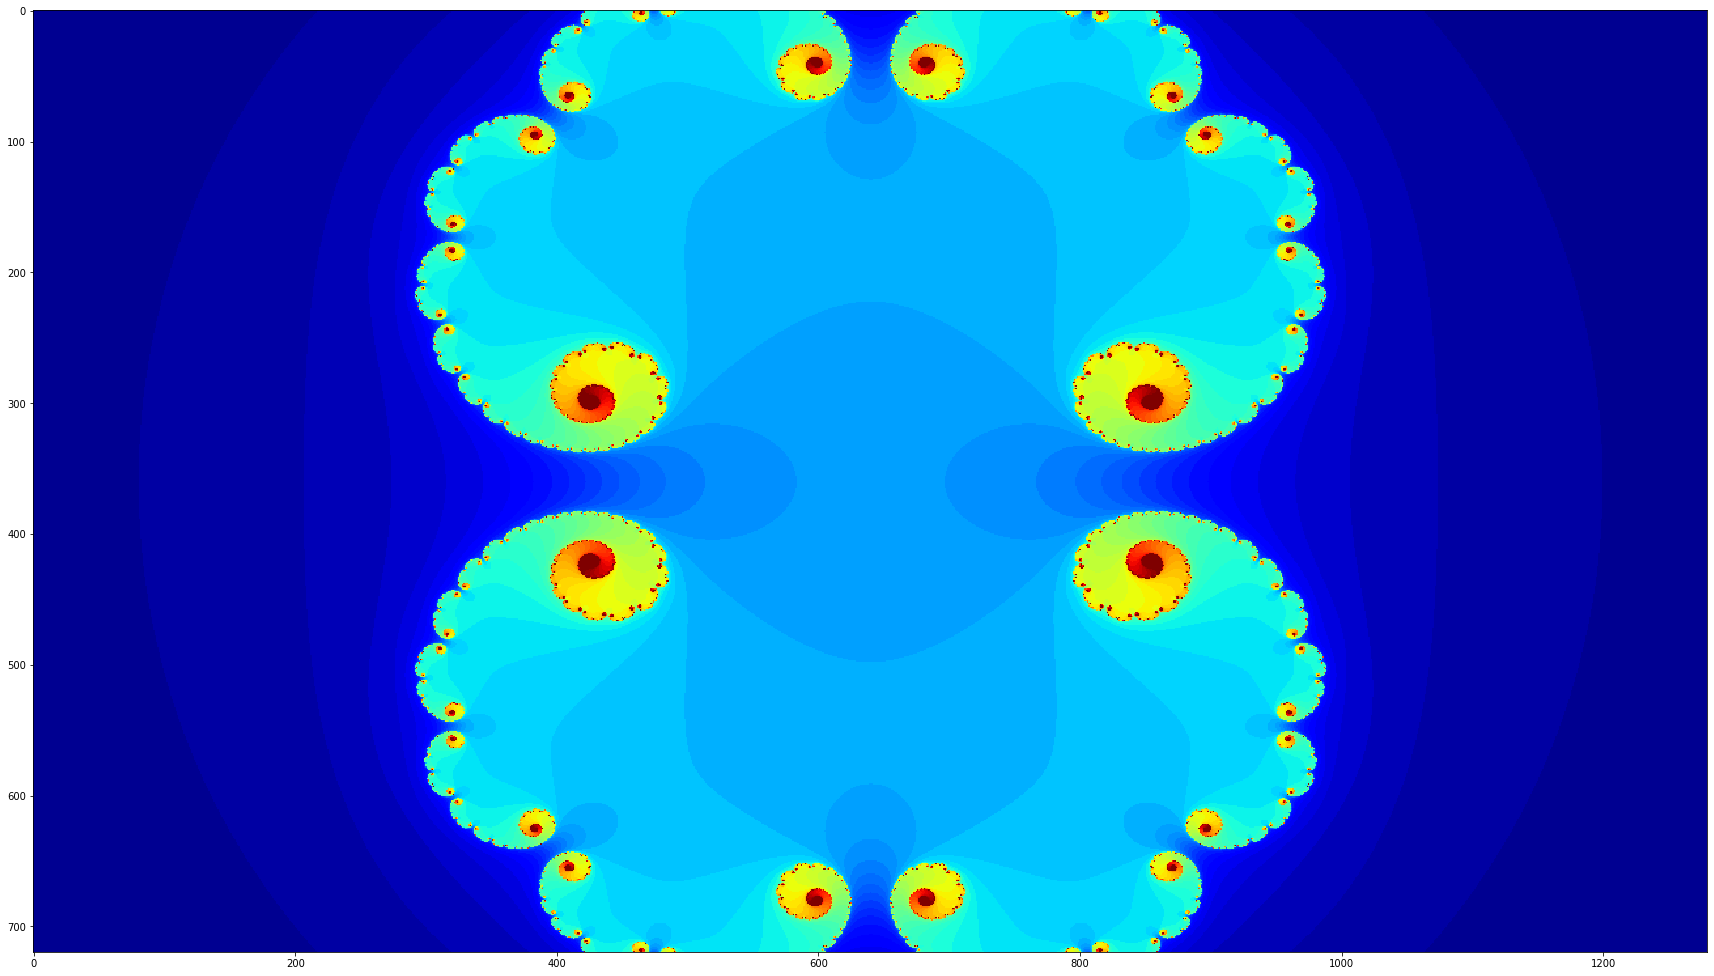

In [4]:
host_output = np.zeros((720,1280),dtype=np.float32)
device_output = cl.Buffer(context, cl.mem_flags.READ_WRITE, size=host_output.nbytes)   

C = [0.279, 0]
event=exe.fractal(queue, host_output.shape, None, np.array(C,dtype=np.float32),np.array([40,70],dtype=np.float32),device_output)

cl.enqueue_copy(queue, host_output, device_output, is_blocking=True, wait_for=[event])

print(host_output.min(),host_output.max())
plt.figure(figsize=(30,30))
plt.imshow(host_output,'jet',vmin=0,vmax=60)
plt.show()